In [1]:
# Instalando bibliotecas
!pip install -q spectral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 3.2 MB/s eta 0:00:00


In [2]:
# Importando bibliotecas
import numpy as np
import tifffile as tif
from spectral import imshow
from math import sqrt
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Definindo função
def rgb_ihs(img):

  # Separando apenas as bandas R, G e B
  img_RGB= np.dstack([img[:,:,2],img[:,:,1],img[:,:,0]])

  # Transformando de 3 para 2 dimensões
  matriz = img_RGB.reshape(img_RGB.shape[0]*img_RGB.shape[1], img_RGB.shape[2])

  # Núcleo da transformação
  M = np.array(([1/sqrt(3),1/sqrt(3),1/sqrt(3)],
                [-1/sqrt(6),-1/sqrt(6),2/sqrt(6)],
                 [-1/sqrt(2),1/sqrt(2),0.0]))

  # Extraindo componentes I, V1 e V2
  ivv = np.zeros(matriz.shape)
  ihs = np.zeros((ivv.shape))
  for i in range(len(matriz)):
    produto = M.dot(matriz[i,:])
    ivv[i,:] = produto
    # Extraindo componentes I, H e S
    ihs[:,0][i] = ivv[:,0][i]
    ihs[:,1][i] = np.arctan(ivv[:,2][i] / ivv[:,1][i])
    ihs[:,2][i] = sqrt((ivv[:,1][i])**2 + (ivv[:,2][i])**2)

  ihs[:,1] = np.nan_to_num(ihs[:,1])

  return ihs.reshape(img_RGB.shape)

In [5]:
# Leitura da imagem
img = tif.imread('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif')

In [18]:
# Rodando função RGB -> IHS
rgb_para_ihs = rgb_ihs(img)

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [27.0, 99.0]
    G: [36.0, 75.0]
    B: [50.0, 78.0]

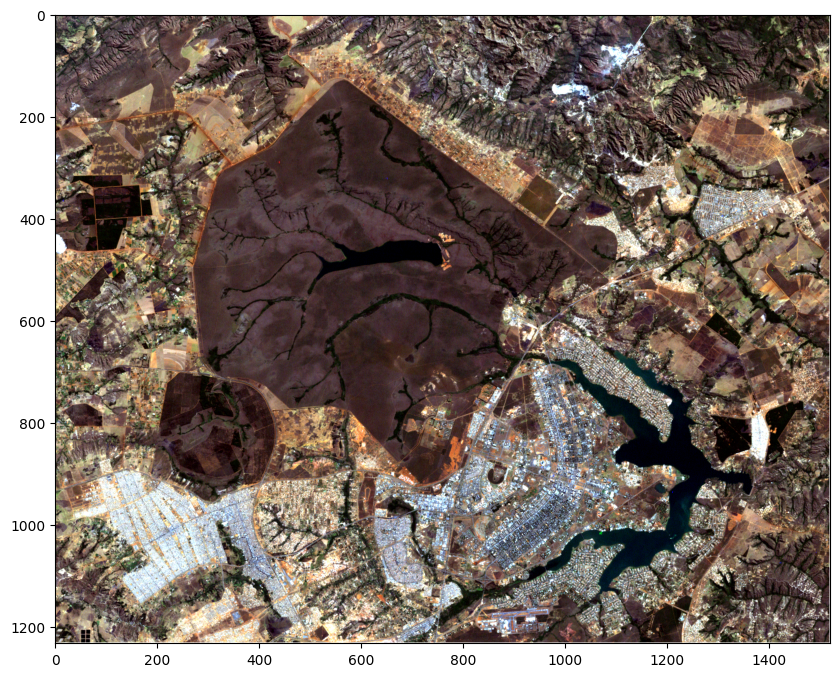

In [71]:
# Visualizando
imshow(img, bands=(2,1,0), stretch=(0.02,0.98), figsize=(10,10))

ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [38.0, 82.66666666666667]
    G: [-1.5183580560458785, 1.4987524460834005]
    B: [5.099019513592785, 22.464787260658998]

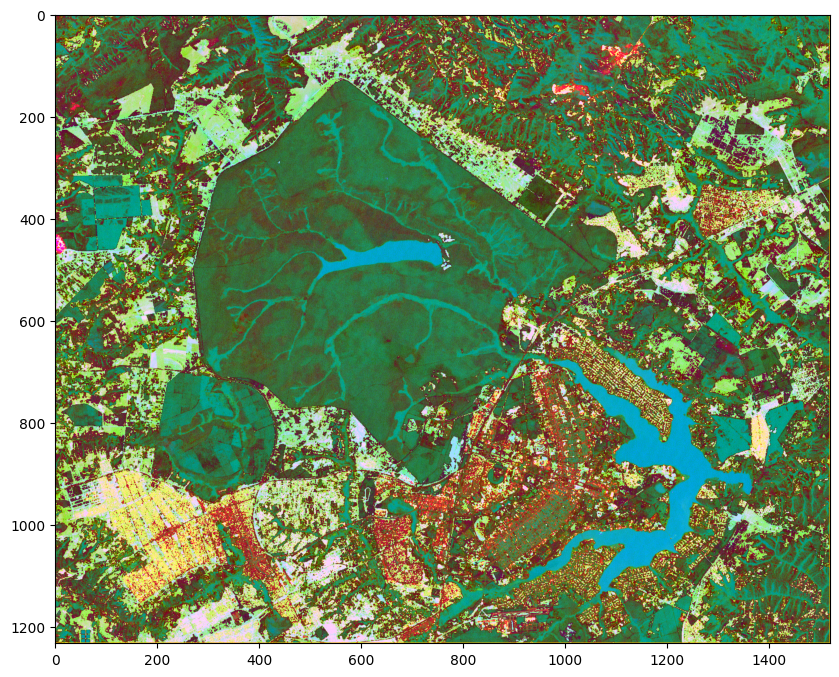

In [15]:
# Visualizando
imshow(rgb_para_ihs, bands=(0,1,2), stretch=(0.02,0.98), figsize=(10,10))